
# **Initiate and Configure Spark**

---


In [1]:
# setting up environment (dependencies) for spark
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
# unxip the downloaded folder 
!tar xf spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark

# Using operating system dependent functionality to read or write a file 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [ ]:
import findspark
findspark.init()

In [ ]:
# importing the required libraries
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import sum, isnan, count, when, col, desc, udf, col, sort_array, asc, avg
from pyspark.sql.window import Window
from pyspark.sql.types import IntegerType
#from pyspark.ml.feature import CountVectorizer, IDF, PCA, RegexTokenizer, StopWordsRemover
#from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer,StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.stat import Correlation, ChiSquareTest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from functools import reduce
from pyspark.sql import DataFrame
from pyspark.sql import functions as f

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

from IPython.display import display

# importing the visualisation libraries
import pandas as pd
import numpy as np
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import pylab

%matplotlib inline

In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Group 137').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"


# **Load Data**

---


In [ ]:
# Load Data
df1 = spark.read.load("02-14-2018.csv", format="csv", inferSchema=True, header=True)
df2 = spark.read.load("02-15-2018.csv", format="csv", inferSchema=True, header=True)
df3 = spark.read.load("02-16-2018.csv", format="csv", inferSchema=True, header=True)
df4 = spark.read.load("02-21-2018.csv", format="csv", inferSchema=True, header=True)
df5 = spark.read.load("02-22-2018.csv", format="csv", inferSchema=True, header=True)
df6 = spark.read.load("02-23-2018.csv", format="csv", inferSchema=True, header=True)
df7 = spark.read.load("02-28-2018.csv", format="csv", inferSchema=True, header=True)
df8 = spark.read.load("03-01-2018.csv", format="csv", inferSchema=True, header=True)
df9 = spark.read.load("03-02-2018.csv", format="csv", inferSchema=True, header=True)


In [ ]:
# Create a list of dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

# Create a merged dataframe
IDS_df = reduce(DataFrame.unionAll, dfs)

In [ ]:
# Print DF to make sure it is working
IDS_df.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-------------

In [ ]:
# renaming columns
IDS_df2 = IDS_df.withColumnRenamed("Dst Port","dst_port").withColumnRenamed("Protocol","protocol").withColumnRenamed("Timestamp","timestamp").withColumnRenamed("Flow Duration","fl_dur").withColumnRenamed("Tot Fwd Pkts","tot_fw_pk").withColumnRenamed("Tot Bwd Pkts","tot_bw_pk").withColumnRenamed("TotLen Fwd Pkts","tot_l_fw_pkt").withColumnRenamed("TotLen Bwd Pkts","tot_l_bwd_pkt ").withColumnRenamed("Fwd Pkt Len Max","fw_pkt_l_max").withColumnRenamed("Fwd Pkt Len Min","fw_pkt_l_min").withColumnRenamed("Fwd Pkt Len Mean","fw_pkt_l_avg").withColumnRenamed("Fwd Pkt Len Std","fw_pkt_l_std").withColumnRenamed("Bwd Pkt Len Max","Bw_pkt_l_max").withColumnRenamed("Bwd Pkt Len Min","Bw_pkt_l_min").withColumnRenamed("Bwd Pkt Len Mean","Bw_pkt_l_avg").withColumnRenamed("Bwd Pkt Len Std","Bw_pkt_l_std").withColumnRenamed("Flow Byts/s","fl_byt_s").withColumnRenamed("Flow Pkts/s","fl_pkt_s").withColumnRenamed("Flow IAT Mean","fl_iat_avg").withColumnRenamed("Flow IAT Std","fl_iat_std").withColumnRenamed("Flow IAT Max", "fl_iat_max").withColumnRenamed("Flow IAT Min","fl_iat_min").withColumnRenamed("Fwd IAT Tot","fw_iat_tot").withColumnRenamed("Fwd IAT Mean","fw_iat_avg").withColumnRenamed("Fwd IAT Std","fw_iat_std").withColumnRenamed("Fwd IAT Max","fw_iat_max").withColumnRenamed("Fwd IAT Min","fw_iat_min").withColumnRenamed("Bwd IAT Tot","bw_iat_tot").withColumnRenamed("Bwd IAT Mean","bw_iat_avg").withColumnRenamed("Bwd IAT Std","bw_iat_std").withColumnRenamed("Bwd IAT Max","bw_iat_max").withColumnRenamed("Bwd IAT Min","bw_iat_min").withColumnRenamed("Fwd PSH Flags","fw_psh_flag").withColumnRenamed("Bwd PSH Flags","bw_psh_flag").withColumnRenamed("Fwd URG Flags","fw_urg_flag").withColumnRenamed("Bwd URG Flags","bw_urg_flag").withColumnRenamed("Fwd Header Len","fw_hdr_len").withColumnRenamed("Bwd Header Len","bw_hdr_len").withColumnRenamed("Fwd Pkts/s","fw_pkt_s").withColumnRenamed("Bwd Pkts/s","bw_pkt_s").withColumnRenamed("Pkt Len Min","pkt_len_min").withColumnRenamed("Pkt Len Max","pkt_len_max").withColumnRenamed("Pkt Len Mean","pkt_len_avg").withColumnRenamed("Pkt Len Std","pkt_len_std").withColumnRenamed("Pkt Len Var","pkt_len_va").withColumnRenamed("FIN Flag Cnt","fin_cnt").withColumnRenamed("SYN Flag Cnt","syn_cnt").withColumnRenamed("RST Flag Cnt","rst_cnt").withColumnRenamed("PSH Flag Cnt","pst_cnt").withColumnRenamed("ACK Flag Cnt","ack_cnt").withColumnRenamed("URG Flag Cnt","urg_cnt").withColumnRenamed("CWE Flag Count","cwe_cnt").withColumnRenamed("ECE Flag Cnt","ece_cnt").withColumnRenamed("Down/Up Ratio","down_up_ratio").withColumnRenamed("Pkt Size Avg","pkt_size_avg").withColumnRenamed("Fwd Seg Size Avg","fw_seg_avg").withColumnRenamed("Bwd Seg Size Avg","bw_seg_avg").withColumnRenamed("Fwd Byts/b Avg","fw_byt_blk_avg").withColumnRenamed("Fwd Pkts/b Avg","fw_pkt_blk_avg").withColumnRenamed("Fwd Blk Rate Avg","fw_blk_rate_avg").withColumnRenamed("Bwd Byts/b Avg","bw_byt_blk_avg").withColumnRenamed("Bwd Pkts/b Avg","bw_pkt_blk_avg").withColumnRenamed("Bwd Blk Rate Avg","bw_blk_rate_avg").withColumnRenamed("Subflow Fwd Pkts","subfl_fw_pk").withColumnRenamed("Subflow Fwd Byts","subfl_fw_byt").withColumnRenamed("Subflow Bwd Pkts","subfl_bw_pkt").withColumnRenamed("Subflow Bwd Byts","subfl_bw_byt").withColumnRenamed("Init Fwd Win Byts","fw_win_byt").withColumnRenamed("Init Bwd Win Byts","bw_win_byt").withColumnRenamed("Fwd Act Data Pkts","Fw_act_pkt").withColumnRenamed("Fwd Seg Size Min","fw_seg_min").withColumnRenamed("Active Mean", "atv_avg").withColumnRenamed("Active Std", "atv_std").withColumnRenamed("Active Max","atv_max").withColumnRenamed("Active Min","atv_min").withColumnRenamed("Idle Mean","idl_avg").withColumnRenamed("Idle Std","idl_std").withColumnRenamed("Idle Max","idl_max").withColumnRenamed("Idle Min","idl_min").withColumnRenamed("Label","label")

In [ ]:
# view the spark Dataframe
IDS_df2.show()

+--------+--------+-------------------+---------+---------+---------+------------+--------------+------------+------------+-------------+--------------+------------+------------+--------------+--------------+---------------+-------------+----------------+----------------+-----------+-----------+------------+----------------+----------------+-----------+-----------+----------+----------------+----------------+----------+----------+-----------+-----------+-----------+-----------+----------+----------+-------------+------------+-----------+-----------+--------------+--------------+----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------------+--------------+-------------+--------------+--------------+--------------+---------------+--------------+--------------+---------------+-----------+------------+------------+------------+----------+----------+----------+----------+-------+-------+-------+-------+------------+--------------+-----------+-----------+-----

In [ ]:
# printing the structure of columns (data types) in the dataset
IDS_df2.printSchema()

root
 |-- dst_port: integer (nullable = true)
 |-- protocol: integer (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- fl_dur: long (nullable = true)
 |-- tot_fw_pk: integer (nullable = true)
 |-- tot_bw_pk: integer (nullable = true)
 |-- tot_l_fw_pkt: integer (nullable = true)
 |-- tot_l_bwd_pkt : double (nullable = true)
 |-- fw_pkt_l_max: integer (nullable = true)
 |-- fw_pkt_l_min: integer (nullable = true)
 |-- fw_pkt_l_avg: double (nullable = true)
 |-- fw_pkt_l_std: double (nullable = true)
 |-- Bw_pkt_l_max: integer (nullable = true)
 |-- Bw_pkt_l_min: integer (nullable = true)
 |-- Bw_pkt_l_avg: double (nullable = true)
 |-- Bw_pkt_l_std: double (nullable = true)
 |-- fl_byt_s: double (nullable = true)
 |-- fl_pkt_s: double (nullable = true)
 |-- fl_iat_avg: double (nullable = true)
 |-- fl_iat_std: double (nullable = true)
 |-- fl_iat_max: double (nullable = true)
 |-- fl_iat_min: double (nullable = true)
 |-- fw_iat_tot: double (nullable = true)
 |-- fw_iat_avg

In [ ]:
# getting the number of rows or data points contained in the dataset
IDS_df2.count()

2775943

In [ ]:
# The total number of attacks per label
IDS_df.groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|1492490|
|    DDOS attack-HOIC| 311858|
|                 Bot| 255832|
|      FTP-BruteForce| 179244|
|      SSH-Bruteforce| 161061|
|    DoS attacks-Hulk| 135772|
|       Infilteration|  93063|
|DoS attacks-SlowH...|  91434|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
|               Label|     24|
|                null|      9|
+--------------------+-------+




# **Task 1: Spark SQL [30 marks]**

---



In [ ]:
# creating view
IDS_df2.createOrReplaceTempView('IDS_dfView')

# Query 1: Finding and visualising counts of benign (normal connections) and harmful (other malicious connection types) connections.

- For each row in the dataset, I used the CASE command to output the 'label' column as 'benign' if the 'label' value is 'Benign', otherwise output as 'harmful'

- Then, I created a count of connection types from the 'label' column using COUNT and GROUP BY commands. Afterwards, I ordered descendingly.

- Finally, I plotted the the counts of benign (normal connections) and harmful (other malicious connection types) connections as a bar chart.

#Results----
- There are much more benign (normal) connetions than harmful (malicious) connections.


+-----------+-------+
|connections| counts|
+-----------+-------+
|     benign|6112146|
|    harmful|2172091|
+-----------+-------+

None


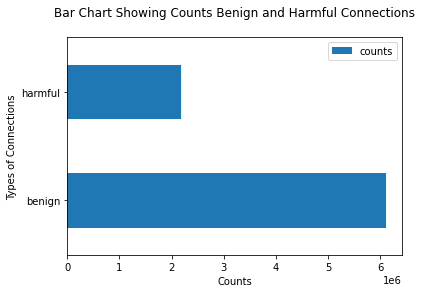

In [ ]:
# Counts of benign and harmful connections
sqlDF = spark.sql("SELECT connections, COUNT(*) AS counts FROM \
           (SELECT protocol, timestamp, fl_dur, tot_fw_pk, tot_bw_pk, fl_byt_s, fl_pkt_s, \
           CASE WHEN label = 'Benign' THEN 'benign' ELSE 'harmful' END AS connections FROM IDS_dfView) \
           GROUP BY connections ORDER BY counts DESC ")
print(sqlDF.show())

# plotting the counts of benign and harmful connections
pandasDF = sqlDF.toPandas()
pandasDF.plot(x ='connections', y='counts', kind = 'barh')
plt.title('Bar Chart Showing Counts Benign and Harmful Connections\n')
plt.ylabel('Types of Connections')
plt.xlabel('Counts');

# Query 2: Grouping (multi-level) and comparing statistics for Benign', 'Brute Force -Web' and 'Bot' label connections using the descriptive statistics (mean, standard deviation, variance, skewness and kurtosis) on each grouping sets for the flow duration column ('fl_dur').


- I used GROUP BY to group using 'label' column in first level and 'protocol' column in second level.
- Then I used GROUPING SETS to create multiple sets of grouping columns for both 'label' and 'protocol' columns.

- Next, I only selected the rows where the labels is 'Benign' or 'Brute Force -Web' or 'Bot' using WHERE command.

- Afterwards, I removed the groups with null labels using the HAVING command.
- Finally, I calculated the statistics of the flow duration  column ('fl_dur')using descriptive statistics like:
-Sum - total.
-Measures of central tendency - average / mean.
-Measures of dispersion - Standard deviation and variance.
-Measures of the asymmetry of the probability distribution - skewness, and kurtosis. 
- These desriptive statistics are calculated for each of the aggregated sets of grouping.
#Results-
- The Brute Force -Web connections have the highest average flow duration
- The groups of Benign have the highest flow duration variance. Their distribution is highly negatively skewed and highly postively tailed.


+----------------+--------+-------+-----------------+---------------------+--------------------+----------------------+----------------------+----------------------+
|           label|protocol| counts|Flow_duration_sum|Flow_duration_average|   Flow_duration_std|Flow_duration_variance|Flow_duration_skewness|Flow_duration_kurtosis|
+----------------+--------+-------+-----------------+---------------------+--------------------+----------------------+----------------------+----------------------+
|          Benign|      17|1715667|    1671015236272|    973974.1081876612|   9130653.244054858|   8.33688286631695E13|     10.38038327483606|    109.92262435515788|
|          Benign|       0|  97104|    8349403912130|   8.59841398102035E7| 6.375388851207392E9|   4.06455830040995E19|   -111.60228539541411|    13088.844709537929|
|          Benign|    null|6344198|   90229729541568|  1.422240124623601E7| 7.893582614602538E8|  6.230864649355544...|    -899.9371749670523|     852640.5312237712|
|   

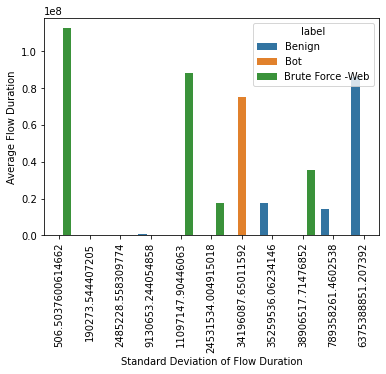

In [ ]:
sqlDF = spark.sql("SELECT label, protocol, COUNT(*) as counts, SUM(CAST(fl_dur AS INTEGER)) AS Flow_duration_sum, \
                  AVG(CAST(fl_dur AS INTEGER)) AS Flow_duration_average, stddev_pop(fl_dur) AS Flow_duration_std, \
                  var_pop (fl_dur) AS Flow_duration_variance, skewness(fl_dur) AS Flow_duration_skewness, \
                  kurtosis(fl_dur) AS Flow_duration_kurtosis  FROM IDS_dfView WHERE label IN ('Benign', 'Brute Force -Web', 'Bot') \
                  GROUP BY GROUPING SETS ((label, protocol), (label), (protocol), ()) \
                  HAVING label <>'null' ORDER BY label")
print(sqlDF.show())

# convert sql DF to Pandas DF
pandasDF = sqlDF.toPandas()

# plotting the 'label' against 'Flow_duration_std' against 'Flow_duration_average'
# using seaborn barplot - color based on count of 3rd variable
sns.barplot(data=pandasDF, x='Flow_duration_std', y='Flow_duration_average', hue='label',
            ci='sd') # dodge offsets the 2 lines slightly since they are overlapping
plt.xticks(rotation=90)
plt.xlabel('Standard Deviation of Flow Duration');
plt.ylabel('Average Flow Duration');


# Query 3: Finding and visualising the types and counts of DOS attacks

+--------------------+---------------------+
|               label|countOfDOSAttackTypes|
+--------------------+---------------------+
|    DDOS attack-HOIC|               686012|
|    DoS attacks-Hulk|               461912|
|DoS attacks-SlowH...|               139890|
|DoS attacks-Golde...|                41508|
|DoS attacks-Slowl...|                10990|
|DDOS attack-LOIC-UDP|                 1730|
+--------------------+---------------------+

None


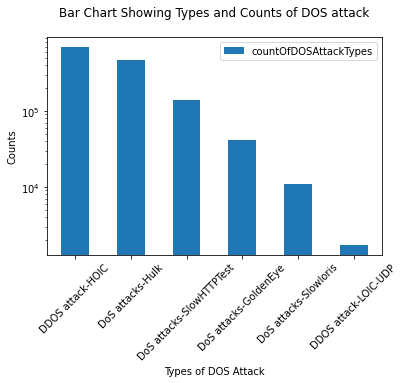

In [ ]:
# finding types and counts of DOS attacks
sqlDF = spark.sql("SELECT label, COUNT(*) AS countOfDOSAttackTypes  FROM \
                   (SELECT protocol, label FROM IDS_dfView WHERE label LIKE 'D%') \
                   GROUP BY label ORDER BY countOfDOSAttackTypes DESC")
print(sqlDF.show())

# plotting the types and counts of DOS attack
pandasDF = sqlDF.toPandas()
pandasDF.plot(x ='label', y='countOfDOSAttackTypes', kind = 'bar', logy=True)
plt.title('Bar Chart Showing Types and Counts of DOS attack\n')
plt.xlabel('Types of DOS Attack')
plt.ylabel('Counts');
plt.xticks(rotation = 45);

# Query 4 : Here in this table you can the pair of Label and protocol with maximum and minimum number of Flow duration with the Average numbr for packets forward and backwards.

- In the below query I have used MAX and MIN sql function to get the maximum and minimum of Flow duration for particular label and created an alias to display in the table.
-  Also I have used CAST sql function which is used to convert to a particular data type.

# RESULT
- Result shows the data of label and protocol combination with the maximum and minimum flow duration and Averate forward and backward packets.

In [ ]:
# Create a query
query = "SELECT label , protocol, MAX(cast(fl_dur as double)) as MAX_FLOW_DURATION, MIN(CAST(fl_dur  AS DECIMAL(18,2))) as MIN_FLOW_DURATION, AVG(tot_fw_pk) AS AVG_TOTAL_FWD_PKT, AVG(tot_bw_pk) AS AVG_TOTAL_BCKD_PKT FROM IDS_dfView GROUP BY label, protocol";
# Executing a query.
crwkDataFrame1 = spark.sql(query)
# Displaying the result of the query in a table format.
crwkDataFrame1 = crwkDataFrame1.dropna(how='any')
crwkDataFrame1.show()

+--------------------+--------+-----------------+-----------------+------------------+-------------------+
|               label|protocol|MAX_FLOW_DURATION|MIN_FLOW_DURATION| AVG_TOTAL_FWD_PKT| AVG_TOTAL_BCKD_PKT|
+--------------------+--------+-----------------+-----------------+------------------+-------------------+
|    DDOS attack-HOIC|       6|          88511.0|             2.00|2.2386984484236425|  0.954793793694571|
|DDOS attack-LOIC-UDP|      17|     1.19999998E8|         61002.00| 117351.4289017341|                0.0|
|    Brute Force -Web|       6|      6.3603693E7|             6.00| 44.88095238095238|   30.0995670995671|
|       Infilteration|       0|      1.1999656E8|            71.00|20.436363636363637|0.30776053215077603|
|DoS attacks-Slowl...|       6|     1.19464329E8|             1.00|  7.66533212010919| 1.9177434030937215|
|       Infilteration|      17|     1.19997528E8|            21.00|1.9161214953271029|  1.596378504672897|
|              Benign|       6|      

# Query 5 : Here in this query I have graphically shown the number of 'Benign' attack carried out during particular date I have used inner queries, several SQL function like TO_DATE to convert String to Date in particular format and ORDER BY and GROUP BY in order to get data as per the Timestamp and count.
# The chart used used is of Pandas Bar chart.
- Have used a inner SQL query to fetch data and use in the main query using the View create 'IDS_dfView'.
- Also used ORDER and GROUP BY keywords to get the Count in particular format.

# RESULT
- Result shows bar chart for the number of attacks carried out on particular date

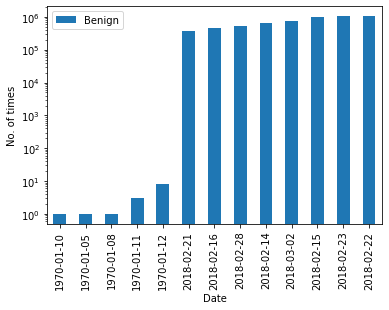

In [ ]:
# Query 2:
attack = 'Benign'
# Executing the query and saving data in a dataframe
crwkDataFrame2 = spark.sql("SELECT Count(*), sub.DateOnly  FROM (SELECT Date(TO_DATE(Timestamp, 'dd/MM/yyyy hh:mm:ss')) DateOnly, label FROM IDS_dfView where label = '{}' ORDER BY DateOnly ) as sub GROUP BY sub.DateOnly".format(attack))
# Dropping the null values if there are any.
crwkDataFrame2 = crwkDataFrame2.dropna(how='any')
pandas_dataframe = crwkDataFrame2.limit(100).toPandas()
# Plotting the chart and providing the X and Y axis
bar_chart = pandas_dataframe.sort_values(by="count(1)", ascending= True).plot(x="DateOnly", y="count(1)", kind="bar",  logy=True)
# Adding label to the X axis
bar_chart.set_xlabel("Date")
# # Adding label to the Y axis
bar_chart.set_ylabel("No. of times")
# Adding legent to the bar chart with the Attack = 'Benign' displayed.
bar_chart.legend([attack]);


In [ ]:
# Types of attacks on 14/02/2018
sqlDF = spark.sql("SELECT label, COUNT(*) FROM IDS_dfView WHERE timestamp \
                  LIKE '14%' GROUP BY label ORDER BY label")
DF = sqlDF.toPandas()
sqlDF.show()



+--------------+--------+
|         label|count(1)|
+--------------+--------+
|        Benign|  667621|
|FTP-BruteForce|  193360|
|SSH-Bruteforce|  187589|
+--------------+--------+



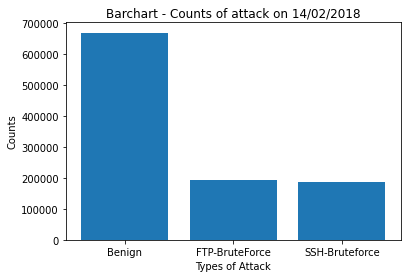

In [ ]:
# plotting the counts of attack on  14/02/2018

#DF.plot(x ='label', y='count(1)', kind = 'bar')
plt.bar(DF['label'], DF['count(1)'])
plt.title('Barchart - Counts of attack on 14/02/2018')
plt.xlabel('Types of Attack')
plt.ylabel('Counts');

In [ ]:
# finding types of attacks on 16/02/2018
sqlDF = spark.sql("SELECT label, COUNT(*) FROM IDS_dfView WHERE timestamp LIKE '16%' GROUP BY label ORDER BY label")
DF = sqlDF.toPandas()
sqlDF.show()

+--------------------+--------+
|               label|count(1)|
+--------------------+--------+
|              Benign|  446772|
|    DoS attacks-Hulk|  461912|
|DoS attacks-SlowH...|  139890|
+--------------------+--------+



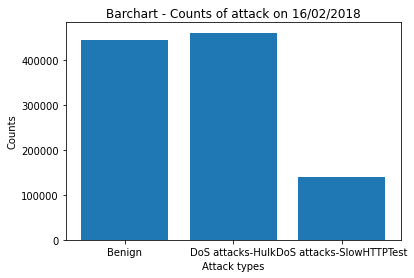

In [ ]:
# plot the counts of attack on  16/02/2018
plt.bar(DF['label'], DF['count(1)'])
plt.title('Barchart - Counts of attack on 16/02/2018')
plt.xlabel('Attack types')
plt.ylabel('Counts');

In [ ]:
# Types and counts of label
sqldf = spark.sql("SELECT label, COUNT(*) FROM IDS_dfView GROUP BY label HAVING count(1) > 1 ORDER BY label DESC")
print(sqldf.show())
pdf = sqldf.toPandas()

+--------------------+--------+
|               label|count(1)|
+--------------------+--------+
|      SSH-Bruteforce|  187589|
|       SQL Injection|      87|
|               Label|      57|
|       Infilteration|  254945|
|      FTP-BruteForce|  193360|
|DoS attacks-Slowl...|   10990|
|DoS attacks-SlowH...|  139890|
|    DoS attacks-Hulk|  461912|
|DoS attacks-Golde...|   41508|
|DDOS attack-LOIC-UDP|    1730|
|    DDOS attack-HOIC|  686012|
|    Brute Force -XSS|     230|
|    Brute Force -Web|     611|
|                 Bot|  286191|
|              Benign| 6344198|
|                   8|       4|
|                   5|       2|
|                   1|       8|
|                   0|      54|
|                null|      98|
+--------------------+--------+

None


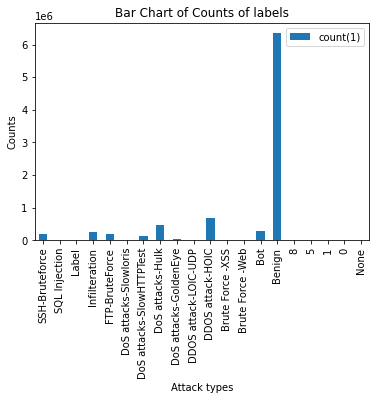

In [ ]:
# plot the types counts of labels
pdf.plot(x ='label', y='count(1)', kind = 'bar')
plt.title('Bar Chart of Counts of labels')
plt.xlabel('Attack types')
plt.ylabel('Counts');


# Find types and counts of labels


In [ ]:
# Types of protocols and sum of tot_fw_pk  on 21/02/2018
sqldf = spark.sql("SELECT protocol, SUM(CAST(tot_fw_pk AS DOUBLE)) FROM IDS_dfView WHERE timestamp LIKE '21%' GROUP BY protocol ORDER BY protocol")
sqldf.show()

+--------+------------------------------+
|protocol|sum(CAST(tot_fw_pk AS DOUBLE))|
+--------+------------------------------+
|       0|                         179.0|
|       6|                     3329787.0|
|      17|                  2.03039993E8|
+--------+------------------------------+



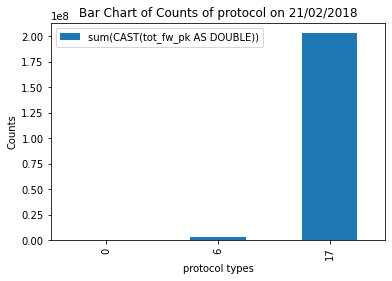

In [ ]:
pdf = sqldf.toPandas()
# plot the types counts of protocols
pdf.plot(x ='protocol', y='sum(CAST(tot_fw_pk AS DOUBLE))', kind = 'bar')
plt.title('Bar Chart of Counts of protocol on 21/02/2018')
plt.xlabel('protocol types')
plt.ylabel('Counts');

In [ ]:
# Student 5 name and ID
# Query 1 [Briefly explain]:



In [ ]:
# Student 5 name and ID
# Query 2 [Briefly explain]:




# **1b: PySpark

---


In [ ]:
# The total number of attacks per label
IDS_df2.select('label').groupBy('label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               label|  count|
+--------------------+-------+
|              Benign|6112146|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|       Infilteration| 161934|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
|               Label|     46|
|                   0|      1|
+--------------------+-------+



In [ ]:
IDS_df2.count()

8284237

In [ ]:
#dropping any rows with null values and then group by label
IDS_df2 = IDS_df2.dropna(how='any')
IDS_df2.groupBy('label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               label|  count|
+--------------------+-------+
|              Benign|6090036|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193354|
|      SSH-Bruteforce| 187589|
|       Infilteration| 161096|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
|                   0|      1|
+--------------------+-------+



In [ ]:
IDS_df2.count()

8261237

In [ ]:
IDS_df2 = IDS_df2.na.drop(how='any')
IDS_df2.groupBy('label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               label|  count|
+--------------------+-------+
|              Benign|6090036|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193354|
|      SSH-Bruteforce| 187589|
|       Infilteration| 161096|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
|                   0|      1|
+--------------------+-------+



In [ ]:
IDS_df2.count()

8261237

# Analytical method 1: Using descriptive statistics like the describe method, skewness and kurtosis on columns 'tot_fw_pk', 'tot_bw_pk' and 'fl_dur'.
- The describe method shows 5 statistics, namely; count, mean, standard deviation, minimum and maximum value. 
- The skewness shows the symmetry of the distribution of the selected columns.
- The kurtosis shows the tailedness of the distribution of the selected columns.

#Result---
- Column 'fl_dur' - representing flow duration has a very high standard deviation as shown by the wide gap between the minimum and maximum values.This is followed by column 'tot_fw_pk' representing the total packets in the forward direction.

- Columns 'tot_fw_pk' and 'tot_bw_pk' are positively skewed meaning its values show greater extreme deviations (outliers) to the right while  column 'fl_dur' is negatively skewed meaning its values showgreater extreme deviations (outliers) to the left

- Columns 'tot_fw_pk', 'tot_bw_pk' and 'fl_dur' are highly leptokurtic since they have kurtosis value greater than 3. This means that they have extreme outliers than does the normal distribution, thus have tails that asymptotically approach zero more slowly than a Gaussian.

- Next, I visualised the data distribution for the 3 selected columns so as to confirm the skewness and kurtosis graphically

In [ ]:
# calculating 5 statistics using the describe method
IDS_df2.select('tot_fw_pk', 'tot_bw_pk', 'fl_dur').describe().show()

+-------+------------------+-----------------+--------------------+
|summary|         tot_fw_pk|        tot_bw_pk|              fl_dur|
+-------+------------------+-----------------+--------------------+
|  count|           8261237|          8261237|             8261237|
|   mean|29.896812547564004|5.945000125283901|1.0192204471571267E7|
| stddev|1748.3297759863294|169.7931243090869|   6.9175515871368E8|
|    min|                 1|                0|       -919011000000|
|    max|            309629|           123118|           120000000|
+-------+------------------+-----------------+--------------------+



In [ ]:
# calculating skewness
IDS_df2.select(f.skewness(IDS_df2['tot_fw_pk']),f.skewness(IDS_df2['tot_bw_pk']), f.skewness(IDS_df2['fl_dur'])).show()

# calculating kurtosis
IDS_df2.select(f.kurtosis(IDS_df2['tot_fw_pk']),f.kurtosis(IDS_df2['tot_bw_pk']), f.kurtosis(IDS_df2['fl_dur'])).show()

+-------------------+-------------------+------------------+
|skewness(tot_fw_pk)|skewness(tot_bw_pk)|  skewness(fl_dur)|
+-------------------+-------------------+------------------+
|  74.47924317595653|  223.8638931458873|-1026.841794982102|
+-------------------+-------------------+------------------+

+-------------------+-------------------+------------------+
|kurtosis(tot_fw_pk)|kurtosis(tot_bw_pk)|  kurtosis(fl_dur)|
+-------------------+-------------------+------------------+
|  5895.140056173959|  96951.88053692288|1110140.5035037303|
+-------------------+-------------------+------------------+



In [ ]:
pandasDF1 = spark.sql('SELECT tot_fw_pk, tot_bw_pk, fl_dur FROM IDS_dfView').toPandas()
pandasDF1.head()

,tot_fw_pk,tot_bw_pk,fl_dur
0,3.0,0.0,112641719.0
1,3.0,0.0,112641466.0
2,3.0,0.0,112638623.0
3,15.0,10.0,6453966.0
4,14.0,11.0,8804066.0


In [ ]:
bins_size = 10**np.arange(0, 9 +.1, .1)
# setting the x ticks to be more reADABle
ticks = [.1, 1, 10, 100, 1000,10000,100000, 1000000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
sns.displot(pandasDF1['fl_dur'], bins=bin_size ,kde=True)
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('fl_dur')
plt.xticks(rotation=45);

count    2.822258e+06
mean     7.690819e+01
std      2.988928e+03
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      3.096290e+05
Name: tot_fw_pk, dtype: float64


count    2.822258e+06
mean     4.179669e-01
std      4.111853e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.010300e-01
75%      6.020600e-01
max      5.490842e+00
Name: tot_fw_pk, dtype: float64


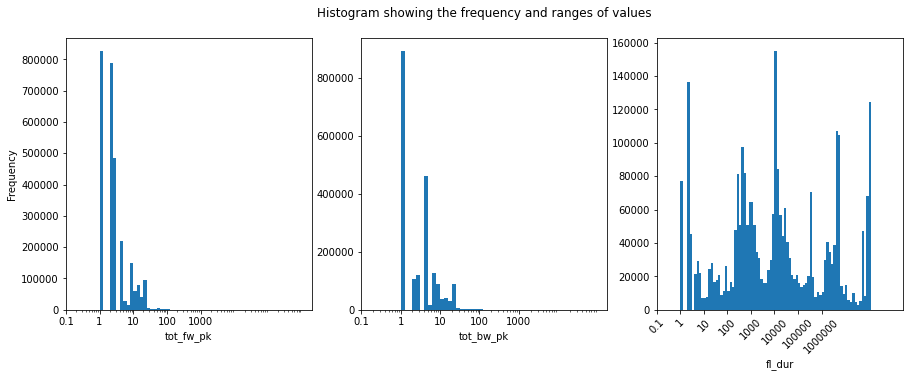

In [ ]:
# converting the selected columns to pandas
#pandasDF1 = spark.sql('SELECT tot_fw_pk, tot_bw_pk, fl_dur FROM IDS_dfView').toPandas()

# printing the describe statistics for column 'tot_fw_pk' and its log to compute its bin size
print(pandasDF1['tot_fw_pk'].describe()) 
print('\n')
print(np.log10(pandasDF1['tot_fw_pk']).describe())

# creating a figure object
plt.figure(figsize=[15,5])

# first plot
plt.subplot(1,3,1)
# transforming scale to log scale using the minimum and maximum 
# values from log of describe on pandasDF1['tot_fw_pk'])
bins_size = 10**np.arange(0, 6 +.1, .1)
# setting the x ticks to be more reADABle
ticks = [.1, 1, 10, 100, 1000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=pandasDF1, x='tot_fw_pk', bins=bins_size);

plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('tot_fw_pk')
plt.ylabel('Frequency');

# second plot
plt.subplot(1,3,2)
# transforming to log scale
bins_size = 10**np.arange(0, 5 +.1, .1)
# setting the x ticks to be more reADABle
ticks = [.1, 1, 10, 100, 1000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=pandasDF1, x='tot_bw_pk', bins=bins_size);
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.title('Histogram showing the frequency and ranges of values\n')
plt.xlabel('tot_bw_pk');

# third plot
plt.subplot(1,3,3)
# transforming to log scale
bins_size = 10**np.arange(0, 9 +.1, .1)
# setting the x ticks to be more reADABle
ticks = [.1, 1, 10, 100, 1000,10000,100000, 1000000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=pandasDF1, x='fl_dur', bins=bins_size);
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('fl_dur')
plt.xticks(rotation=45);

count    8.284191e+06
mean     2.981952e+01
std      1.745907e+03
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      3.096290e+05
Name: tot_fw_pk, dtype: float64


count    8.284191e+06
mean     4.505551e-01
std      3.976536e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.010300e-01
75%      6.989700e-01
max      5.490842e+00
Name: tot_fw_pk, dtype: float64


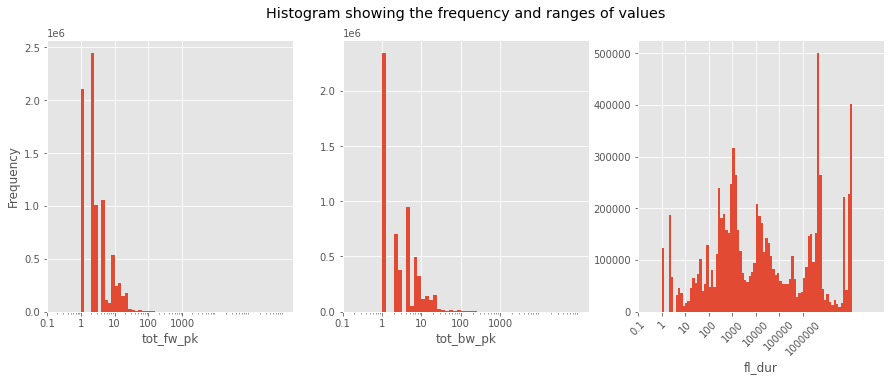

In [ ]:
# converting the selected columns to pandas
pandasDF1 = spark.sql('SELECT tot_fw_pk, tot_bw_pk, fl_dur FROM IDS_dfView').toPandas()

# printing the describe statistics for column 'tot_fw_pk' and its log to compute its bin size
print(pandasDF1['tot_fw_pk'].describe()) 
print('\n')
print(np.log10(pandasDF1['tot_fw_pk']).describe())

# creating a figure object
plt.figure(figsize=[15,5])

# first plot
plt.subplot(1,3,1)
# transforming scale to log scale using the minimum and maximum 
# values from log of describe on pandasDF1['tot_fw_pk'])
bins_size = 10**np.arange(0, 6 +.1, .1)
# setting the x ticks to be more reADABle
ticks = [.1, 1, 10, 100, 1000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=pandasDF1, x='tot_fw_pk', bins=bins_size);
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('tot_fw_pk')
plt.ylabel('Frequency');

# second plot
plt.subplot(1,3,2)
# transforming to log scale
bins_size = 10**np.arange(0, 5 +.1, .1)
# setting the x ticks to be more reADABle
ticks = [.1, 1, 10, 100, 1000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=pandasDF1, x='tot_bw_pk', bins=bins_size);
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.title('Histogram showing the frequency and ranges of values\n')
plt.xlabel('tot_bw_pk');

# third plot
plt.subplot(1,3,3)
# transforming to log scale
bins_size = 10**np.arange(0, 9 +.1, .1)
# setting the x ticks to be more reADABle
ticks = [.1, 1, 10, 100, 1000,10000,100000, 1000000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=pandasDF1, x='fl_dur', bins=bins_size);
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('fl_dur')
plt.xticks(rotation=45);

# Results (Continued)
- The column 'fl_dur' - representing the flow duration is highly negatively skewed since its values show greater extreme deviations (outliers) to the right. 
- The column 'fl_dur' - representing the flow duration has very high positive kurtosis since its values show great tailedness as the tails of the distribution contain extreme values.   


# Analytical method 2: Using correlation
Correlation gives the strength of relationship between features in the dataset(Pairwise correlation). The relationship can be either positive or negative or 0

In [ ]:
# creating the dataframe of features to be correlated
corr_df = IDS_df2.drop('dst_port').drop('timestamp').drop('protocol').drop('label')
corr_df = corr_df.withColumn("fw_blk_rate_avg", corr_df.fw_blk_rate_avg.cast("integer"))
corr_df = corr_df.na.drop()
corr_df.take(5)

# creating a vector column from the columns of features
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=corr_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_df).select(vector_col)
# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)
matrix.show(truncate=False)

# pull out correlation matrix and convert it to an array and then a list
matrix_list = matrix.collect()[0][0].toArray().tolist()

# converting the matrix list back to spark dataframe
matrix_df = spark.createDataFrame(matrix_list, corr_df.columns)
matrix_df.show(truncate=False)

# convert from spark dataframe to pandas dataframe
matrix_dfPandas = matrix_df.toPandas()
matrix_dfPandas

,fl_dur,tot_fw_pk,tot_bw_pk,tot_l_fw_pkt,tot_l_bwd_pkt,fw_pkt_l_max,fw_pkt_l_min,fw_pkt_l_avg,fw_pkt_l_std,Bw_pkt_l_max,Bw_pkt_l_min,Bw_pkt_l_avg,Bw_pkt_l_std,fl_byt_s,fl_pkt_s,fl_iat_avg,fl_iat_std,fl_iat_max,fl_iat_min,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min,fw_psh_flag,bw_psh_flag,fw_urg_flag,bw_urg_flag,fw_hdr_len,bw_hdr_len,fw_pkt_s,bw_pkt_s,pkt_len_min,pkt_len_max,pkt_len_avg,pkt_len_std,pkt_len_va,fin_cnt,syn_cnt,rst_cnt,pst_cnt,ack_cnt,urg_cnt,cwe_cnt,ece_cnt,down_up_ratio,pkt_size_avg,fw_seg_avg,bw_seg_avg,fw_byt_blk_avg,fw_pkt_blk_avg,fw_blk_rate_avg,bw_byt_blk_avg,bw_pkt_blk_avg,bw_blk_rate_avg,subfl_fw_pk,subfl_fw_byt,subfl_bw_pkt,subfl_bw_byt,fw_win_byt,bw_win_byt,Fw_act_pkt,fw_seg_min,atv_avg,atv_std,atv_max,atv_min,idl_avg,idl_std,idl_max,idl_min
0,1.000000,0.116316,0.055962,0.087218,0.040366,0.154579,0.037478,0.082928,0.082201,0.249991,-0.120389,0.228997,0.205841,NaN,NaN,0.530970,0.540763,0.771126,0.453851,0.996987,0.577135,0.614519,0.769459,0.483193,0.793312,0.405757,0.577190,0.600372,0.210708,0.062934,NaN,-0.009374,NaN,0.118029,0.060476,-0.124862,-0.129476,0.037419,0.246691,0.265082,0.235319,0.047300,-0.017666,0.062934,0.047679,0.023310,-0.003419,-0.053328,-0.009374,0.047679,-0.093779,0.237391,0.082928,0.228997,NaN,NaN,NaN,NaN,NaN,NaN,0.116316,0.087218,0.055962,0.040366,0.011846,-0.029958,0.115474,-0.126209,0.199535,0.179026,0.234075,0.151657,0.731863,0.302629,0.752759,0.703756
1,0.116316,1.000000,0.016596,0.735579,0.010111,-0.012672,0.023254,-0.004726,-0.017541,-0.017529,-0.012202,-0.015490,-0.016805,NaN,NaN,-0.006458,-0.006022,-0.007235,-0.005578,0.117008,-0.006833,-0.006592,-0.007035,-0.005810,-0.005931,-0.004180,-0.005875,-0.005473,-0.002158,-0.005205,NaN,-0.000877,NaN,0.999737,0.012283,-0.011250,-0.011806,0.024047,-0.016400,-0.007237,-0.018557,-0.002011,-0.001630,-0.005205,-0.014467,-0.029734,-0.020715,-0.005383,-0.000877,-0.014467,-0.021951,-0.009504,-0.004726,-0.015490,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.735579,0.016596,0.010110,-0.023386,-0.008505,0.999922,-0.042589,-0.000991,-0.000365,-0.000789,-0.000939,-0.007412,-0.002564,-0.007557,-0.007197
2,0.055962,0.016596,1.000000,0.206393,0.953054,0.059539,-0.007481,0.037116,0.030449,0.058252,-0.007022,0.128535,0.026100,NaN,NaN,-0.005774,0.008875,0.027510,-0.006419,0.051982,-0.004465,0.017737,0.021271,-0.006402,0.068280,0.003299,0.015865,0.042969,-0.001056,0.012291,NaN,-0.001004,NaN,0.033719,0.978076,-0.010823,-0.010808,-0.007662,0.068623,0.155740,0.070101,0.027101,-0.001648,0.012291,0.013404,0.021124,-0.013264,-0.004992,-0.001004,0.013404,0.108324,0.145068,0.037116,0.128535,NaN,NaN,NaN,NaN,NaN,NaN,0.016596,0.206393,1.000000,0.953049,-0.001840,0.009531,0.007292,-0.004393,0.028148,0.019035,0.034321,0.025617,0.024014,0.020878,0.025108,0.021971
3,0.087218,0.735579,0.206393,1.000000,0.003273,0.057659,0.017246,0.069572,0.023911,-0.009389,-0.009451,-0.010972,-0.011124,NaN,NaN,-0.005077,-0.004011,-0.004632,-0.004490,0.087748,-0.005322,-0.004149,-0.004429,-0.004666,0.000177,-0.002766,-0.003615,-0.002350,-0.001497,-0.004095,NaN,-0.000707,NaN,0.735483,0.094342,-0.009005,-0.009428,0.017647,0.027586,0.012331,0.006374,0.035145,-0.001311,-0.004095,-0.010066,-0.020858,-0.016284,-0.004298,-0.000707,-0.010066,-0.015720,0.009576,0.069572,-0.010972,NaN,NaN,NaN,NaN,NaN,NaN,0.735579,1.000000,0.206393,0.003273,-0.017227,-0.005288,0.735627,-0.031832,0.006269,0.014070,0.014680,0.002454,-0.004856,-0.000389,-0.004798,-0.004924
4,0.040366,0.010111,0.953054,0.003273,1.000000,0.018268,-0.004318,-0.002781,0.002828,0.040955,-0.003179,0.122585,0.011571,NaN,NaN,-0.003124,0.002888,0.024828,-0.003024,0.036289,-0.002751,0.008435,0.018318,-0.003148,0.046591,-0.000727,0.005738,0.033076,-0.001178,0.010558,NaN,-0.000475,NaN,0.027889,0.984039,-0.006105,-0.006309,-0.004374,0.037871,0.142511,0.049171,0.019703,-0.000880,0.010558,0.004086,0.010127,-0.005078,-0.002885,-0.000475,0.004086,0.082014,0.132790,-0.002781,0.122585,NaN,NaN,NaN,

#Results
- A perfect positive correlation (1) exists between column 'tot_fw_pk' (total packet in forward direction) and 'subfl_fw_pk' (The average number of packets in a sub flow in the forward direction)
- A perfect positive correlation (1) exists between column 'tot_bw_pk' (total packet in backward direction) and 'subfl_bw_pkt' (The average number of packets in a sub flow in the backward direction)
- Very high positive correlation (0.95) exist between column 'tot_l_bw_pkt'(Total size of packet in backward direction) and 'tot_bw_pk' (total packet in backward direction)
- High positive correlation (0.75) exist between column 'tot_l_fw_pkt'(Total size of packet in forward direction) and tot_fw_pk (total packet in forward direction)

- Therefore, only one of the features that are highly correlated can be kept and others removed when building Machine Learning models to reduce multicollinearity 

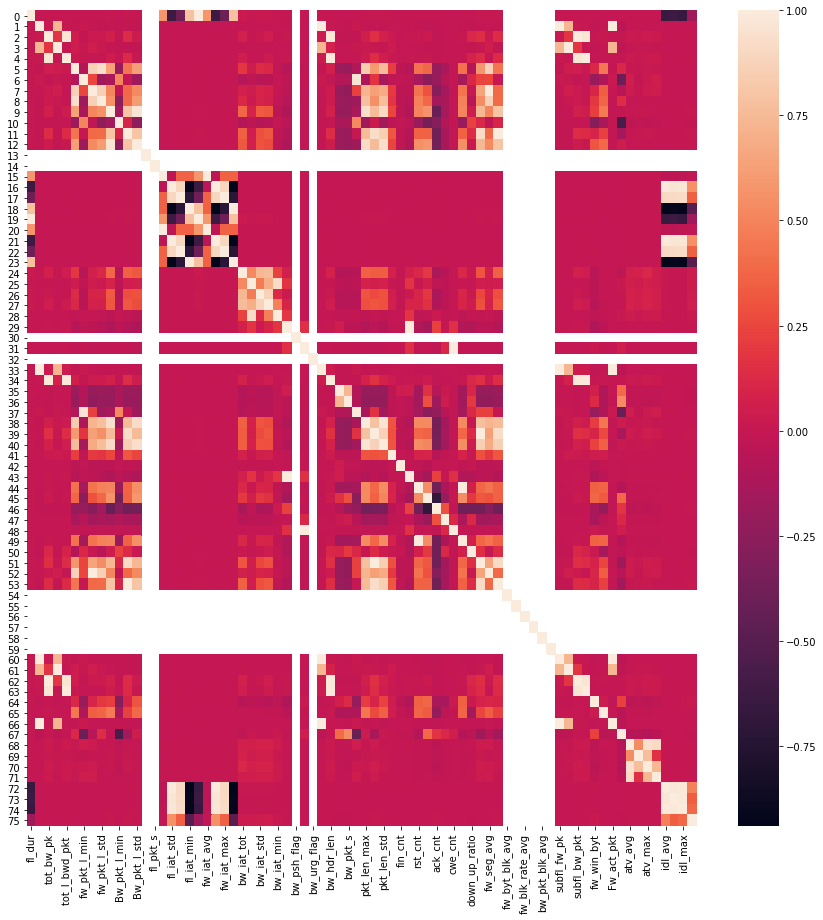

In [ ]:
# plotting matrix as heat map
plt.figure(figsize=[15,15])
sns.heatmap(matrix_dfPandas);


# Analytical method 3: Using Hypothesis Test - Chisquare Test 
Determines whether the label is statistically significant (not occured by chance)  or not significant (occured by chance) by testing the label against  each feature.
#Results
- For the column 'protocol' (Transaction protocol), the chisquare critical value at about 0 p-value (0.00000001) and 26 degree of freedom is 88.41159 which is far less than the calculated statistical value (471479.9929). This means that there is statistically significant difference between the  'protocol' and 'label' columns and the results are not due to chance.

- For the column 'tot_fw_pk' (Total packets in the forward direction), the chisquare critical value at about 0 p-value (0.00000001) and 34723 degree of freedom is 36272.487 which is far less than the calculated statistical value (8791714.3356). This means that there is statistically significant difference between the  'tot_fw_pk' and 'label' columns and the results are not due to chance.

- For the column 'tot_bw_pk' (Total packets in the backward direction), the chisquare critical value at about 0 p-value (0.00000001) and 17862 degree of freedom is 18979.523 which is far less than the calculated statistical value (4381126.4833). This means that there is statistically significant difference between the  'tot_bw_pkl' and 'label' columns and the results are not due to chance.

In [ ]:
# selecting the features to use in chi-square test
chi_df = IDS_df2.select('protocol','tot_fw_pk', 'tot_bw_pk', 'label')
# chi_df = chi_df.filter("label is not NULL and protocol is not NULL and tot_fw_pk is not NULL and tot_bw_pk is not NULL")

# encoding the label column using string indexer
indexer = StringIndexer(inputCol="label", outputCol="labelEncoded")
chi_df_indexed= indexer.fit(chi_df).transform(chi_df)

# creating assembles of vectors for the selected features while skipping the null values
assembler_chi = VectorAssembler(inputCols=chi_df.drop('label').columns, outputCol='features', handleInvalid = "skip")
chi_df_vec = assembler_chi.transform(chi_df_indexed).select('labelEncoded','features')

# doing chisquare test for the created features vectors
chisquare = ChiSquareTest.test(dataset= chi_df_vec, featuresCol='features', labelCol='labelEncoded')
print(chisquare.show())
print(chisquare.select('pValues').collect())
print(chisquare.select("degreesOfFreedom").collect())
print(chisquare.select('statistics').collect())

+-------------+------------------+--------------------+
|      pValues|  degreesOfFreedom|          statistics|
+-------------+------------------+--------------------+
|[0.0,0.0,0.0]|[26, 34723, 17862]|[471479.992872814...|
+-------------+------------------+--------------------+

None
[Row(pValues=DenseVector([0.0, 0.0, 0.0]))]
[Row(degreesOfFreedom=[26, 34723, 17862])]
[Row(statistics=DenseVector([471479.9929, 8791714.3356, 4381126.4833]))]


# Analytical method 4: Here I have created a Density Plot to display the total packets forwarded during the attack carried out with the density.

- Created list of attacks and columns.
- Used select and where function of PySpark.
- Create two different Dataframe to hold the date for particular attack.
- Using Pandas library for plotting a density plot with labels.



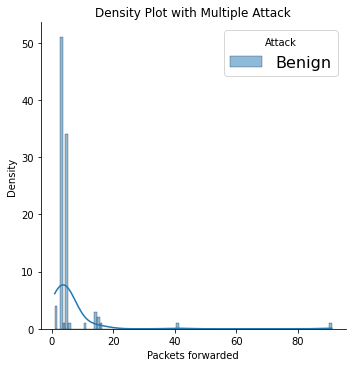

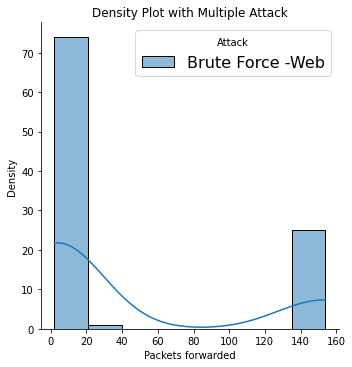

In [ ]:
# Creating list for attacks and columns
attacks = ['Benign', 'Brute Force -Web']
columns = ['tot_fw_pk', 'tot_bw_pk', 'fl_dur', 'label']

# Executing query and saving data in DataFrame
crwkDataFramePySpark1 = IDS_df2.select(columns).where( "label = 'Benign'").limit(100)
crwkDataFramePySpark2 = IDS_df2.select(columns).where( "label = 'Brute Force -Web'").limit(100)

# Creating a Pandas dataframe using toPandas method, which we use to plot the density plot.
pandas_df1 = crwkDataFramePySpark1.toPandas()
pandas_df2 = crwkDataFramePySpark2.toPandas()

# Made a union of two dataframes
pandas_dfs = [pandas_df1, pandas_df2]
pandas_df = pd.concat([pandas_df1,pandas_df2])
for attack in attacks:
    # Subset to the attack
    subset = pandas_df[pandas_df['label'] == attack]
    # Draw the density plot
    sns.displot(subset['tot_fw_pk'],  kde = True,
                 label = attack)
    
    # Designing Plot graph
    plt.legend(prop={'size': 16}, title = 'Attack')
    # Added title to the plot
    plt.title('Density Plot with Multiple Attack')
    # Adding label to the X axis
    plt.xlabel('Packets forwarded')
    # Adding label to the X axis
    plt.ylabel('Density')
    

# Here I have created a Density Plot to display the total packets forwarded during the attack carried out with the density.

# Analytical method 5: Percentile
- Here I have used a quatile analytical method to display the quartiles for column 'tot_fw_pk'
- Here, pandas_df.sort_value would sort values in an ascending order for tot_fw_pk
- Calculating 25th percentile : (25*100)*100 = 25, so here P(25) here is 3, Similarly P(50) is also 3 and P(75) is 5 which
- means 75% takes values of 5 or less.

In [ ]:
# Analytical method 2: QUANTILE

# Sorting values in ascending order for quantile
pandas_df_quantile = pandas_df1.sort_values(by = ['tot_fw_pk'])
# Resetting  index for new sorted dataframe
pandas_df_quantile = pandas_df_quantile.reset_index(drop=True)
# Displaying the sorted dataframe
display(pandas_df_quantile)
# Creating quartiles of the value passed in the array
quartiles = pandas_df.quantile([0.25, 0.5, 0.75])
# Displaying quartiles.
display(quartiles)







,tot_fw_pk,tot_bw_pk,fl_dur,label
0,1,1,581,Benign
1,1,1,678,Benign
2,1,1,666,Benign
3,1,1,676,Benign
4,3,0,112641719,Benign
...,...,...,...,...
95,15,17,3714671,Benign
96,15,10,6453966,Benign
97,16,12,6989341,Benign
98,41,36,23325726,Benign


,tot_fw_pk,tot_bw_pk,fl_dur
0.25,3.0,0.0,4.748620e+05
0.50,4.0,3.0,5.008360e+06
0.75,5.0,4.0,1.126352e+08


# Analytical method 6: Five number summary

- Here I have used a Five number summary which shows all the mean, std, all quariles and max
- And there is a boxplot which also show where the most of the data range

,tot_fw_pk,tot_bw_pk
count,100.000000,100.000000
mean,41.060000,27.590000
std,65.059696,44.518773
min,2.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,3.000000
75%,54.750000,38.750000
max,154.000000,108.000000


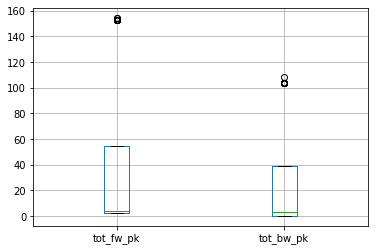

In [ ]:
# Analytical method 3: Five number summary

# Creating a new dataframe for Five Number Summary for two columns tot_fw_pk and tot_bw_pk for label 'Brute Force -Web'
crwkDataFrameFiveNumberSummary = IDS_df2.select('tot_fw_pk', 'tot_bw_pk').where( "label = 'Brute Force -Web'").limit(100)
pandasDfFiveNumberSummary = crwkDataFrameFiveNumberSummary.toPandas()
quartiles_fw = pandasDfFiveNumberSummary.quantile([0.25, 0.5 , 0.75])

display(pandasDfFiveNumberSummary.describe())
# Creating a boxplot to view  where the range of data lies
boxplot = pandasDfFiveNumberSummary.boxplot()



## PySpark - 2b

---


# Machine Learning Technique:Build a Machine Learning model using Logistic Regression model and evaluate using a MulticlassClassificationEvaluator.
- Firstly, I did some feature enineering which involves dropping the 'timestamp' column because it is different for every rows in our dataset and thus, encoding it might not be useful. 
- I also dropped the null values so as not to affect the assembler.
- Next, I encoded the 'label' column using string indexer.
- Then, I created features vector for the columns of features using vector assembler
- Created a pipeline to fit and transform the assembler
- Instantiated a Logistic Regression Claasifier - multiclassification
- Finally, I evaluated the model






In [ ]:
# dropping the timestamp column and null values
IDS_df2_ml = IDS_df2.drop('timestamp')
IDS_df2_ml = IDS_df2_ml.na.drop()
IDS_df2_ml = IDS_df2_ml.withColumn("fl_dur", IDS_df2_ml.fl_dur.cast("integer"))

# encoding the label column
indexer = StringIndexer(inputCol="label", outputCol="labelEncoded")
IDS_df2_indexed= indexer.fit(IDS_df2_ml).transform(IDS_df2_ml)
IDS_df2_indexed.take(5)

[Row(dst_port=0, protocol=0, fl_dur=112641719, tot_fw_pk=3, tot_bw_pk=0, tot_l_fw_pkt=0, tot_l_bwd_pkt =0.0, fw_pkt_l_max=0, fw_pkt_l_min=0, fw_pkt_l_avg=0.0, fw_pkt_l_std=0.0, Bw_pkt_l_max=0, Bw_pkt_l_min=0, Bw_pkt_l_avg=0.0, Bw_pkt_l_std=0.0, fl_byt_s=0.0, fl_pkt_s=0.0266331163, fl_iat_avg=56320859.5, fl_iat_std=139.3000358938, fl_iat_max=56320958.0, fl_iat_min=56320761.0, fw_iat_tot=112641719.0, fw_iat_avg=56320859.5, fw_iat_std=139.3000358938, fw_iat_max=56320958.0, fw_iat_min=56320761.0, bw_iat_tot=0.0, bw_iat_avg=0.0, bw_iat_std=0.0, bw_iat_max=0.0, bw_iat_min=0.0, fw_psh_flag=0, bw_psh_flag=0, fw_urg_flag=0, bw_urg_flag=0, fw_hdr_len=0, bw_hdr_len=0, fw_pkt_s=0.0266331163, bw_pkt_s=0.0, pkt_len_min=0, pkt_len_max=0, pkt_len_avg=0.0, pkt_len_std=0.0, pkt_len_va=0.0, fin_cnt=0, syn_cnt=0, rst_cnt=0, pst_cnt=0, ack_cnt=0, urg_cnt=0, cwe_cnt=0, ece_cnt=0, down_up_ratio=0, pkt_size_avg=0.0, fw_seg_avg=0.0, bw_seg_avg=0.0, fw_byt_blk_avg=0, fw_pkt_blk_avg=0, fw_blk_rate_avg=0, bw_byt_

In [ ]:
# dropping the timestamp column and null values
IDS_df2_ml = IDS_df2.drop('timestamp')
IDS_df2_ml = IDS_df2_ml.na.drop()
IDS_df2_ml = IDS_df2_ml.withColumn("fl_dur", IDS_df2_ml.fl_dur.cast("integer"))

# encoding the label column
indexer = StringIndexer(inputCol="label", outputCol="labelEncoded")
IDS_df2_indexed= indexer.fit(IDS_df2_ml).transform(IDS_df2_ml)
IDS_df2_indexed.take(5)

[Row(dst_port=0, protocol=0, fl_dur=112641719, tot_fw_pk=3, tot_bw_pk=0, tot_l_fw_pkt=0, tot_l_bwd_pkt =0.0, fw_pkt_l_max=0, fw_pkt_l_min=0, fw_pkt_l_avg=0.0, fw_pkt_l_std=0.0, Bw_pkt_l_max=0, Bw_pkt_l_min=0, Bw_pkt_l_avg=0.0, Bw_pkt_l_std=0.0, fl_byt_s=0.0, fl_pkt_s=0.0266331163, fl_iat_avg=56320859.5, fl_iat_std=139.3000358938, fl_iat_max=56320958.0, fl_iat_min=56320761.0, fw_iat_tot=112641719.0, fw_iat_avg=56320859.5, fw_iat_std=139.3000358938, fw_iat_max=56320958.0, fw_iat_min=56320761.0, bw_iat_tot=0.0, bw_iat_avg=0.0, bw_iat_std=0.0, bw_iat_max=0.0, bw_iat_min=0.0, fw_psh_flag=0, bw_psh_flag=0, fw_urg_flag=0, bw_urg_flag=0, fw_hdr_len=0, bw_hdr_len=0, fw_pkt_s=0.0266331163, bw_pkt_s=0.0, pkt_len_min=0, pkt_len_max=0, pkt_len_avg=0.0, pkt_len_std=0.0, pkt_len_va=0.0, fin_cnt=0, syn_cnt=0, rst_cnt=0, pst_cnt=0, ack_cnt=0, urg_cnt=0, cwe_cnt=0, ece_cnt=0, down_up_ratio=0, pkt_size_avg=0.0, fw_seg_avg=0.0, bw_seg_avg=0.0, fw_byt_blk_avg=0, fw_pkt_blk_avg=0, fw_blk_rate_avg=0, bw_byt_

In [ ]:
assembler = VectorAssembler(inputCols=IDS_df2_indexed.drop('label').drop('labelEncoded').columns, outputCol='features', handleInvalid='skip')

In [ ]:
# instantiating an assembler
assembler = VectorAssembler(inputCols=IDS_df2_indexed.drop('label').drop('labelEncoded').columns, outputCol='features', handleInvalid='skip')
pipeline = Pipeline(stages=[assembler])

# splitting data into training and test set
piped_data = pipeline.fit(IDS_df2_indexed).transform(IDS_df2_indexed)
``
training, test = piped_data.randomSplit([0.8, 0.2])

# instantiating and fitting a machine learning model - lodistic regression
lr = LogisticRegression(labelCol='labelEncoded',featuresCol='features')
lrModel = lr.fit(training)

In [ ]:
# Make predictions
predictions = lrModel.transform(test)
predictions.show()

+--------+--------+-------------------+---------+---------+---------+------------+--------------+------------+------------+------------+------------+------------+------------+------------+------------+--------+----------------+------------+--------------+-----------+-----------+------------+------------+--------------+-----------+-----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+----------+----------+----------------+----------------+-----------+-----------+-----------+-----------+----------+-------+-------+-------+-------+-------+-------+-------+-------+-------------+------------+----------+----------+--------------+--------------+---------------+--------------+--------------+---------------+-----------+------------+------------+------------+----------+----------+----------+----------+-------+-------+-------+-------+------------+--------------+-----------+-----------+--------------+------------+--------------------+-----

In [ ]:
# evaluating the model
eval = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='labelEncoded')
eval.evaluate(predictions)

0.88648

# Machine Learning Technique: Clustering
# What to achieve: Creating clusters for tot_fw_pk and tot_bw_pk for different attacks

- Initially I created two arrays for attacks and columns.
- Used a for loop to iterate over the attacks.
- Using select I fetched the data for particular label and saved in a dataframe.
- Created a VectorAssembler for the columns which can used a feature columns.
- Created a KMeans Model having clusters k = 4, which means that data should be divided in 4 different clusters.

# RESULT
- In the first table we can visualize the data range for two columns and in which cluster they belong to. Here **features** columns define the combination of all the feature column that we have passed in the Vector Assember input.
- In the second table we can see the number being divided based on the cluster, and their count.


In [ ]:
attacks = ['Benign', 'Brute Force -Web']
columns = ['tot_fw_pk', 'tot_bw_pk']


for idx,attack in enumerate(attacks):
    #Fetching the records with label
    crwkDataFramePySparkML = IDS_df2.select(columns).where( "label = '"+attack+"'")
    # Creating a vectorAssember with input columns    
    vecAssembler = VectorAssembler(inputCols=columns, outputCol="features")
    # Creating a new dataframe using vector assember transform 
    new_df = vecAssembler.transform(crwkDataFramePySparkML)
    kmeans = KMeans(k=4)  # 4 clusters here
    model = kmeans.fit(new_df.select('features'))
    transformed = model.transform(new_df)
    print("Clusters for "+attack)
    # Displaying the clusters
    transformed.show()
    # Grouping the cluster and showing the count of which cluster has how many features.
    transformed.groupBy("prediction").count().show()

Clusters for Benign
+---------+---------+-----------+----------+
|tot_fw_pk|tot_bw_pk|   features|prediction|
+---------+---------+-----------+----------+
|        3|        0|  [3.0,0.0]|         0|
|        3|        0|  [3.0,0.0]|         0|
|        3|        0|  [3.0,0.0]|         0|
|       15|       10|[15.0,10.0]|         0|
|       14|       11|[14.0,11.0]|         0|
|       16|       12|[16.0,12.0]|         0|
|        3|        0|  [3.0,0.0]|         0|
|        3|        0|  [3.0,0.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|         0|
|        5|        3|  [5.0,3.0]|  

In [ ]:
# install nbconvert
!pip install nbconvert 